<img src="tp3.PNG">

- ##  Le but  :
 Le but de ce chapitre est d’aborder le calcul général de l’intégrale d’une fonction $f(x)$ sur un domaine fini délimité par des bornes finies $a$ et $b$
<img src="f.PNG">

## <div style="color:steelBlue;padding:2%;text-decoration: underline;">Méthode des rectangles: </div>
> #### <font color="Indigo" size="5"/> Principe :
<img src="rec.PNG">
> La valeur approchée de l'integrale de $f$ sur $I$ par la méthode des rectangles à gauche est alors donnée par :<img src="vrec.PNG">

> #### <font color="Indigo" size="5"/> Code Python :

In [79]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [80]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

## <div style="color:steelBlue;padding:2%;text-decoration: underline;">Méthode des trapèzes: </div>
> #### <font color="Indigo" size="5"/> Principe :
<img src="trap.PNG">
> La valeur approchée de l'integrale de $f$ sur $I$ par la méthode des trapèzes est alors donnée par : <img src="vtrap.PNG">

> #### <font color="Indigo" size="5"/> Code Python :

In [81]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

## <div style="color:steelBlue;padding:2%;text-decoration: underline;">Méthode de Simpson: </div>
> #### <font color="Indigo" size="5"/> Principe :
<img src="sim.PNG">
>  La valeur approchée de l'integrale de $f$ sur $I$ par la méthode de Simpson est alors donnée par : <img src="vsim.PNG">

> #### <font color="Indigo" size="5"/> Code Python :

In [82]:
class Simpson(object):
    def __init__(self, a, b, n, f): 
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n 

    def integrate(self,f):
        x=self.x
        y=f(x) 
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution=1001):
        xl = self.x 
        yl = f(xl) 
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            aa=xl[i]
            bb=xl[i+1]
            l0 = (xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1 = (xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2 = (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            P = f(aa)*l0 + f(m)*l1 + f(bb)*l2
            plt.plot(xx,P,'b')
            plt.plot(m,f(m),"r*")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'bo')
        
        plt.ylabel('f(x)')
        plt.title('Simpson')
        

## <div style="color:steelBlue;padding:2%;text-decoration: underline;">Méthode des Points Milieux : </div>
> #### <font color="Indigo" size="5"/> Principe :
<img src="mil.png">
>  La valeur approchée de l'integrale de $f$ sur $I$ par la méthode des Points Milieux est alors donnée par : <img src="vmil.png">

> #### <font color="Indigo" size="5"/> Code Python :

In [83]:
class Milieu(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)        
        for i in range(self.n):            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0  , f(m), f(m)  , 0 , 0 ] 
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"b*")
            
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Milieu')
        


In [84]:

Sel=widgets.Dropdown(
    options=[('Méthode des réctangles gauches', 1), ('Méthode des Trapèzes', 2),('Méthodes des Points Milieux', 3) ,
             ('Méthodes de Simpson', 4)],
    value=1,
    description='Méthode:',
)
text_func = widgets.Text(value='cos(x)', description='Fonction', continuous_update=False)
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='1', description='a', continuous_update=False)
text_b = widgets.Text(value='2', description='b', continuous_update=False)
text_n = widgets.Text(value='4', description='n', continuous_update=False)

text_int = widgets.Text(value='', description='I_n', continuous_update=True)
button = widgets.Button(description="Calculer",
                        button_style = 'danger',
                       icon = 'check'
                       )

def sim(b):
    dic={1:RectangleG,2:Trapezoidal,3:Milieu,4:Simpson}
    s=Sel.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value



def update_a(change):
    change.new    
def update_b(change):
    change.new
def update_n(change):
    change.new
def update_f(change):
    change.new

button.on_click(sim)


text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')



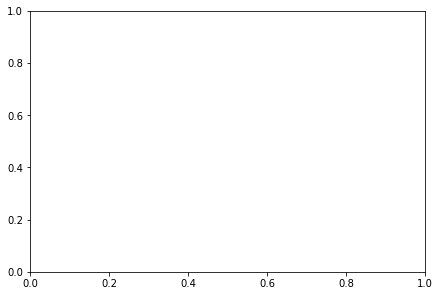

In [85]:
output = widgets.Output()

with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))     

fig.canvas.toolbar_position = 'bottom'

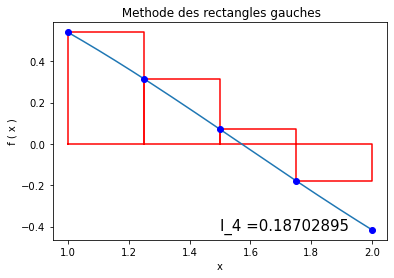

In [86]:

def make_boxes():
    
    vbox1 = widgets.VBox([ Sel, text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([ output])
    return vbox1, vbox2
box_layout = widgets.Layout(
      border='solid 2px ',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px', 
                    
    
)

        
vbox1, vbox2 = make_boxes()
 
vbox1.layout = box_layout
vbox2.layout = box_layout

widgets.HBox([vbox1, vbox2])
